# Summer Temprature Comparisons
## Nashville, Los Angeles, New York

By Sada Garba, 24 June 2016

This is a quick comparison of historical weather temperatures in three cities -- Nashville, Los Angeles and New York.
I'm trying to decide where to go for my late summer vacation in September 2016, so I'll be comparing weather temperatures from June - September of last year (2015).


## Data Source

All data was sourced from [Weather Underground](https://www.wunderground.com/history/)

- **New York** -- newyork_2015.csv
- **Los Angeles** -- losangeles_2015.csv
- **Nashville** -- nashville_2015.csv



## Clean Data

Lets read the data in and clean it

### Read in Data

In [69]:
from pandas import *

# read NY
newyork = read_csv('newyork_2015.csv')

# read LA
losangeles = read_csv('losangeles_2015.csv')

# read Nashville
nashville = read_csv('nashville_2015.csv')

print("NY \n", newyork.dtypes)
print("LA \n", losangeles.dtypes)
print("Nash \n", nashville.dtypes)

NY 
 EST                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles          float64
 Mean VisibilityMiles         float64
 Min VisibilityMiles          float64
 Max Wind SpeedMPH            float64
 Mean Wind SpeedMPH           float64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                   float64
 Events                        object
 WindDirDegrees<br />          object
dtype: object
LA 
 PST                            object
Max TemperatureF                int64
Mean TemperatureF         

### Clean the row values ...

In [70]:
# optional cleaning/renaming of column names
newyork = newyork.rename(columns={' WindDirDegrees<br />' : 'WindDirDegrees', ' EST': 'EST'})
newyork['WindDirDegrees'] = newyork['WindDirDegrees'].str.rstrip('<br />')

losangeles = losangeles.rename(columns={' WindDirDegrees<br />' : 'WindDirDegrees', ' PST': 'PST'})
losangeles['WindDirDegrees'] = losangeles['WindDirDegrees'].str.rstrip('<br />')

nashville = nashville.rename(columns={' WindDirDegrees<br />' : 'WindDirDegrees', ' CST': 'CST'})
nashville['WindDirDegrees'] = nashville['WindDirDegrees'].str.rstrip('<br />')


In [71]:
# converting time column data_type to datetime from object or whatever it was
# ...then set the index of each dataframe to be the datetime column
newyork['EST'] = to_datetime(newyork['EST'])
newyork.index = newyork['EST']

losangeles['PST'] = to_datetime(losangeles['PST'])
losangeles.index = losangeles['PST']

nashville['CST'] = to_datetime(nashville['CST'])
nashville.index = nashville['CST']


In [72]:
# get the summer months
start = datetime(2015, 5, 1)
end = datetime(2015, 9, 30)
nysummer = newyork.ix[start : end]
lasummer = losangeles.ix[start : end]
nashsummer = nashville.ix[start : end]

#### Display the cities' minimum and maximum mean temperatures in the summer

In [73]:
# ...now look for something ...random
print("NY")
print(nysummer['Mean TemperatureF'].max())
print(nysummer['Mean TemperatureF'].min(),"\n")

print("LA")
print(lasummer['Mean TemperatureF'].max())
print(lasummer['Mean TemperatureF'].min(),"\n")

print("Nash")
print(nashsummer['Mean TemperatureF'].max())
print(nashsummer['Mean TemperatureF'].min(),"\n")

NY
88
53 

LA
89
57 

Nash
86
55 



### Graph the Cities' Temperatures

In [74]:
%matplotlib inline

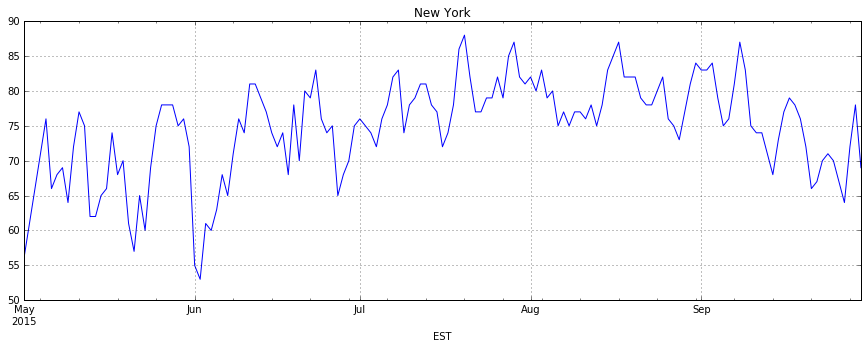

In [75]:
# graph this bad boy
col = 'Mean TemperatureF'

nysummer[col].plot(grid=True, figsize=(15,5), title="New York")

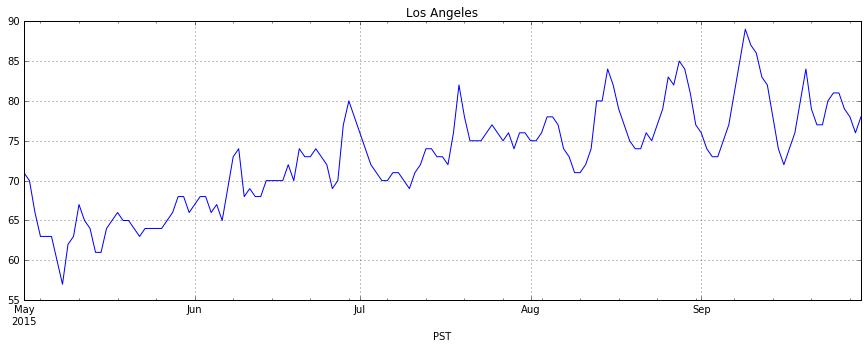

In [76]:
lasummer[col].plot(grid=True, figsize=(15,5), title="Los Angeles")

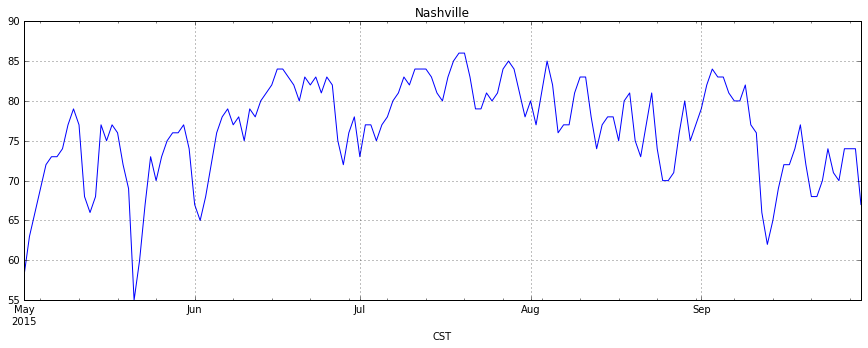

In [77]:
nashsummer[col].plot(grid=True, figsize=(15,5), title="Nashville")

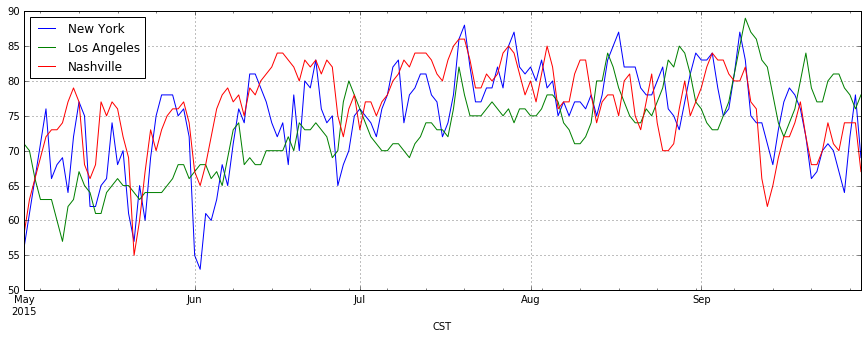

In [78]:
nyp = nysummer[col].plot(grid=True, figsize=(15,5), label="New York", legend=True)
lap = lasummer[col].plot(grid=True, figsize=(15,5), label="Los Angeles", legend=True)
nap = nashsummer[col].plot(grid=True, figsize=(15,5), label="Nashville", legend=True)


### Conclusions

In general it appears that the mean temperatures in New York and Los Angeles peak somewhere around the start of the second week of September.  The mean temperature in Los Angeles also rises steadily through from June to early September although with the least week-to-week temperature variance (New York appears to have the most variance).  Nashville and New York are consistently warmer than Los Angeles in June and July. Surprisingly, Nashville appears to have the coolest overall September of the three cities.